In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
st = pd.read_csv('/content/Tata_Motors_Stock_Data - TATAMOTORS.NS .csv')
st.head(10)
st.info()
st.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       249 non-null    float64
 2   High       249 non-null    float64
 3   Low        249 non-null    float64
 4   Close      249 non-null    float64
 5   Adj Close  249 non-null    float64
 6   Volume     249 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


,Open,High,Low,Close,Adj Close,Volume
count,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,428.279719,433.013455,422.194378,427.199999,427.199999,1.721530e+07
std,22.645788,22.791886,22.811019,23.045489,23.045489,1.036854e+07
min,380.250000,384.649994,366.200012,372.299988,372.299988,2.871205e+06
25%,411.899994,417.299988,406.149994,411.700012,411.700012,1.098752e+07
50%,428.799988,434.950012,423.649994,427.950012,427.950012,1.436204e+07
75%,443.950012,447.250000,436.250000,442.000000,442.000000,1.912591e+07
max,490.899994,494.399994,484.200012,489.850006,489.850006,7.142575e+07


Text(0.5, 1.0, 'graph between open and close')

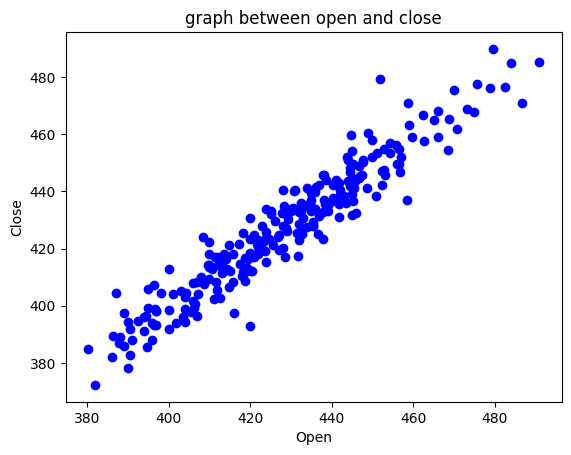

In [ ]:
X_train = st['Open']
y_train = st['Close']
plt.scatter(X_train, y_train, color = 'blue')
plt.xlabel("Open")
plt.ylabel("Close")
plt.title("graph between open and close")

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(1), loss = 'mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs = 100)
epochs_hist.history.keys

Epoch 1/100
8/8 [==============================] - 5s 3ms/step - loss: 45763.3828
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 20578.6016
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 6765.4771
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 3841.4336
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 1518.2264
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 931.0743
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 371.0531
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 218.7343
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 148.7202
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 71.3224
Epoch 11/100
8/8 [==============================] - 0s 3ms/step - loss: 48.0018
Epoch 12/100
8/8 [==============================] - 0s 3ms/step - loss: 46.8688
Epoch 13/100
8/8 [===============

<function dict.keys>

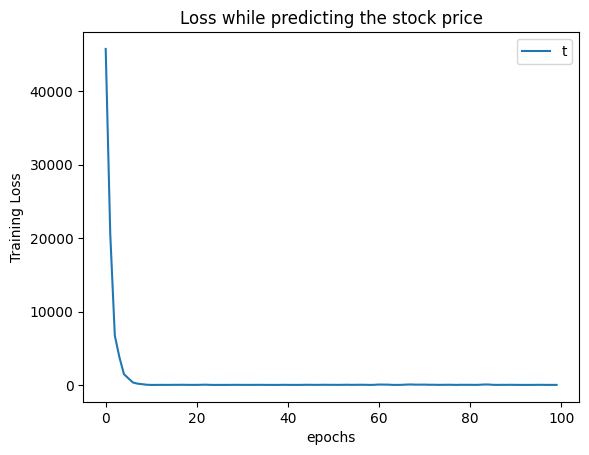

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Loss while predicting the stock price')
plt.xlabel('epochs')
plt.ylabel('Training Loss')
plt.legend('training losS')

In [ ]:
model.get_weights()

[array([[0.9966384]], dtype=float32), array([0.7471026], dtype=float32)]

In [ ]:
open = 445
close = model.predict([open])
print("predicted close value is: ", close)

1/1 [==============================] - 0s 74ms/step
predicted close value is:  [[444.2512]]


In [ ]:
from sklearn.linear_model import LinearRegression
model2 = model
model2.score(X_train, y_train)

AttributeError: ignored